Zahara Morris - Property Sales Transactions

Link - https://data.wprdc.org/dataset/real-estate-sales/resource/57b84145-f9eb-493b-a78f-9bc803413d99

The code below analyzes property sales for the year 2025. It collects the top Zipcodes and ranks them based on the highest number of sales, the greatest total sales value, and the highest average property value


Areas with the Most Houses Sold (by ZIP Code):

 PROPERTYZIP  Sales_Count  Total_Sales_Value  Average_Sale_Price
       15108          837          234443686              280100
       15237          749          234458774              313029
       15235          709          102880287              145106
       15212          691          280251473              405574
       15210          637           59094968               92771
       15221          597           68772443              115197
       15044          565          199141510              352463
       15205          542          106037844              195642
       15206          517          116896751              226106
       15227          516           76521211              148297


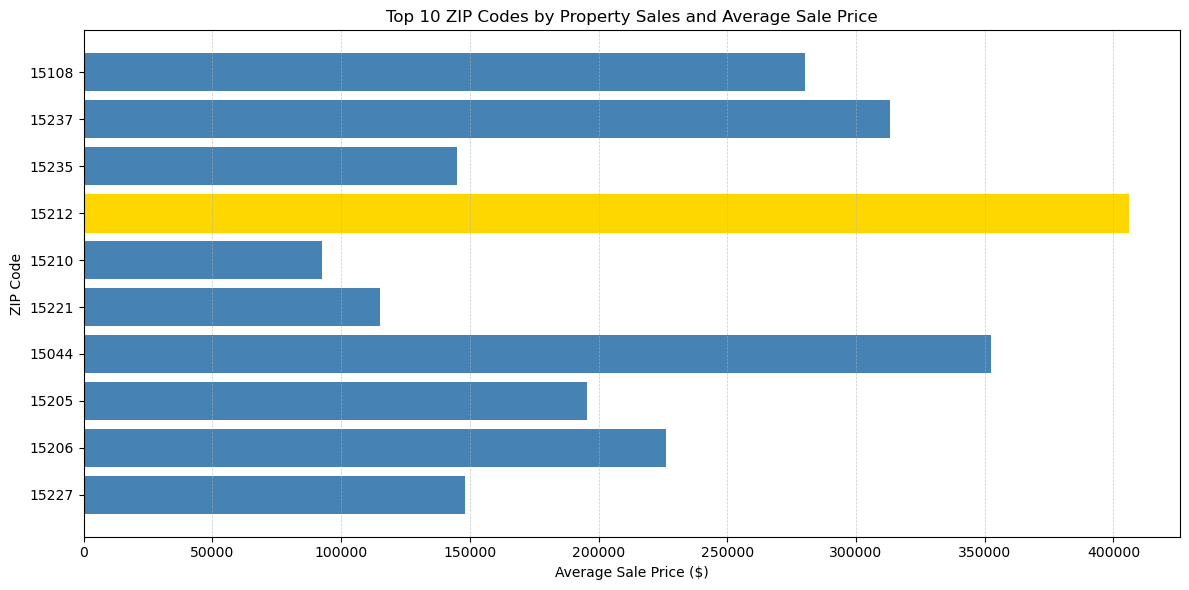

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# === Config ===
FILE_PATH = "PropertySales.csv"  
ZIP_COL = "PROPERTYZIP"
PRICE_COL = "PRICE"
SALE_DATE_COL = "SALEDATE"

def main():
    # ---- Load dataset ----
    df = pd.read_csv(FILE_PATH)

    # Convert types
    df[PRICE_COL] = pd.to_numeric(df[PRICE_COL], errors="coerce")
    df[SALE_DATE_COL] = pd.to_datetime(df[SALE_DATE_COL], errors="coerce")

    # Drop missing ZIPs or invalid rows
    df = df.dropna(subset=[ZIP_COL, PRICE_COL])

    # ---- Summarize by ZIP code ----
    summary = (
        df.groupby(ZIP_COL)
        .agg(
            Sales_Count=(PRICE_COL, "count"),
            Total_Sales_Value=(PRICE_COL, "sum"),
            Average_Sale_Price=(PRICE_COL, "mean"),
        )
        .sort_values("Sales_Count", ascending=False)
        .reset_index()
    )

    # Round values for readability
    summary["Total_Sales_Value"] = summary["Total_Sales_Value"].round(0).astype(int)
    summary["Average_Sale_Price"] = summary["Average_Sale_Price"].round(0).astype(int)

    # ---- Display top 10 ----
    print("\nAreas with the Most Houses Sold (by ZIP Code):\n")
    print(summary.head(10).to_string(index=False))

    # ---- Visualization ----
    top20 = summary.head(10)

    plt.figure(figsize=(12, 6))
    bars = plt.barh(
        top20[ZIP_COL].astype(str),
        top20["Average_Sale_Price"],
        color="steelblue",
    )

    # Highlight Central Northside ZIP (15212)
    for i, zip_code in enumerate(top20[ZIP_COL]):
        if str(zip_code) == "15212":
            bars[i].set_color("gold")

    # Labels and formatting
    plt.xlabel("Average Sale Price ($)")
    plt.ylabel("ZIP Code")
    plt.title("Top 10 ZIP Codes by Property Sales and Average Sale Price")
    plt.gca().invert_yaxis()  # Highest at top
    plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()